In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

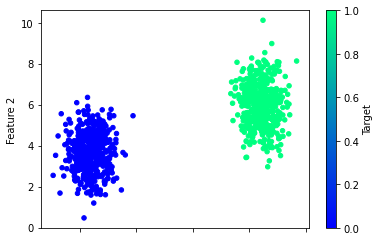

In [2]:
# Generate a dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)


# Creating a DataFrame with the dummy data
df= pd.DataFrame(X, columns = ["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter" )

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

2022-03-04 17:01:41.139866: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential Model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 824us/step - loss: 1.0863 - accuracy: 0.1160
Epoch 2/100
24/24 [==============================] - 0s 779us/step - loss: 1.0475 - accuracy: 0.0987
Epoch 3/100
24/24 [==============================] - 0s 792us/step - loss: 1.0124 - accuracy: 0.1053
Epoch 4/100
24/24 [==============================] - 0s 815us/step - loss: 0.9801 - accuracy: 0.1133
Epoch 5/100
24/24 [==============================] - 0s 815us/step - loss: 0.9508 - accuracy: 0.1200
Epoch 6/100
24/24 [==============================] - 0s 984us/step - loss: 0.9241 - accuracy: 0.1267
Epoch 7/100
24/24 [==============================] - 0s 975us/step - loss: 0.9005 - accuracy: 0.1453
Epoch 8/100
24/24 [==============================] - 0s 871us/step - loss: 0.8786 - accuracy: 0.1573
Epoch 9/100
24/24 [==============================] - 0s 786us/step - loss: 0.8596 - accuracy: 0.1733
Epoch 10/100
24/24 [==============================] - 0s 949us/step - loss: 0.8421 - accura

24/24 [==============================] - 0s 800us/step - loss: 0.4542 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 796us/step - loss: 0.4361 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 770us/step - loss: 0.4189 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 784us/step - loss: 0.4026 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 774us/step - loss: 0.3873 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 761us/step - loss: 0.3728 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 776us/step - loss: 0.3591 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 753us/step - loss: 0.3463 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 773us/step - loss: 0.3342 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 784us/step - loss: 0.3228 - accuracy: 

<AxesSubplot:>

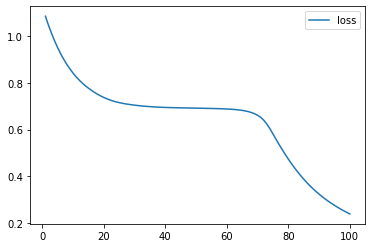

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

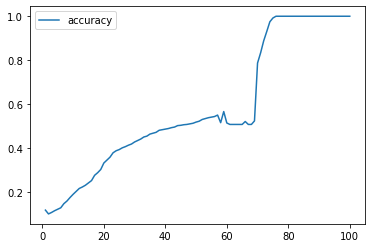

In [12]:
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2404 - accuracy: 1.0000 - 100ms/epoch - 12ms/step
Loss: 0.2404358983039856, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

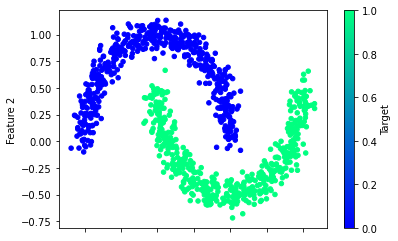

In [15]:
#19.2.4 make_moons
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the sclaer
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.6253
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.6480
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.6653
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.6813
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.6973
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.7107
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7173
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7253
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7360
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7427
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8933
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.8933
Epoch 93/100


<AxesSubplot:>

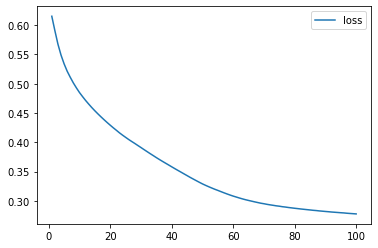

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

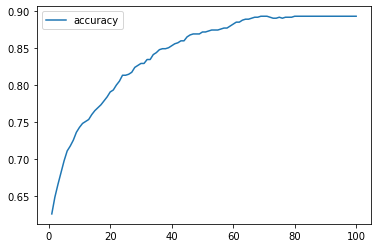

In [19]:
history_df.plot(y="accuracy")

In [20]:
#19.2.5 Multiple Neurons

# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add teh output layer that uses a probablility activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 793us/step - loss: 0.7682 - accuracy: 0.2413
Epoch 2/100
24/24 [==============================] - 0s 839us/step - loss: 0.7294 - accuracy: 0.3667
Epoch 3/100
24/24 [==============================] - 0s 827us/step - loss: 0.6937 - accuracy: 0.5893
Epoch 4/100
24/24 [==============================] - 0s 831us/step - loss: 0.6605 - accuracy: 0.7907
Epoch 5/100
24/24 [==============================] - 0s 853us/step - loss: 0.6293 - accuracy: 0.7973
Epoch 6/100
24/24 [==============================] - 0s 852us/step - loss: 0.5994 - accuracy: 0.7827
Epoch 7/100
24/24 [==============================] - 0s 853us/step - loss: 0.5711 - accuracy: 0.8307
Epoch 8/100
24/24 [==============================] - 0s 902us/step - loss: 0.5450 - accuracy: 0.8640
Epoch 9/100
24/24 [==============================] - 0s 869us/step - loss: 0.5201 - accuracy: 0.8827
Epoch 10/100
24/24 [==============================] - 0s 853us/step - loss: 0.4974 - accura

24/24 [==============================] - 0s 777us/step - loss: 0.1848 - accuracy: 0.9307
Epoch 82/100
24/24 [==============================] - 0s 766us/step - loss: 0.1831 - accuracy: 0.9307
Epoch 83/100
24/24 [==============================] - 0s 755us/step - loss: 0.1814 - accuracy: 0.9307
Epoch 84/100
24/24 [==============================] - 0s 727us/step - loss: 0.1797 - accuracy: 0.9307
Epoch 85/100
24/24 [==============================] - 0s 763us/step - loss: 0.1779 - accuracy: 0.9307
Epoch 86/100
24/24 [==============================] - 0s 874us/step - loss: 0.1764 - accuracy: 0.9307
Epoch 87/100
24/24 [==============================] - 0s 823us/step - loss: 0.1746 - accuracy: 0.9307
Epoch 88/100
24/24 [==============================] - 0s 754us/step - loss: 0.1729 - accuracy: 0.9333
Epoch 89/100
24/24 [==============================] - 0s 729us/step - loss: 0.1713 - accuracy: 0.9347
Epoch 90/100
24/24 [==============================] - 0s 734us/step - loss: 0.1697 - accuracy: 

In [30]:
# Skill drill 19.2.6
history_Series = pd.Series(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

history_Series.head(20)

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
dtype: object

In [32]:
history_Series = pd.Series(model_moon.history)
history_Series

loss        [0.6150933504104614, 0.590560257434845, 0.5674...
accuracy    [0.625333309173584, 0.6480000019073486, 0.6653...
dtype: object